# A posição da faixa no álbum afeta sua popularidade? Varia de artista para artista?

In [ ]:
# Imports

import pandas as pd
from plotnine import *

import matplotlib.pyplot as plt
import seaborn as sns

In [32]:
# Datasets

beatles_df = pd.DataFrame(pd.read_csv("./Artista_data/beatles_spotify.csv", sep=','))
beatles_df["artist"] = "The Beatles"

ed_sheeran_df = pd.DataFrame(pd.read_csv("./Artista_data/ed_sheeran_spotify.csv", sep=','))
ed_sheeran_df["artist"] = "Ed Sheeran"

elton_john_df = pd.DataFrame(pd.read_csv("./Artista_data/elton_john_spotify.csv", sep=','))
elton_john_df["artist"] = "Elton John"

metallica_df = pd.DataFrame(pd.read_csv("./Artista_data/metallica_spotify.csv", sep=','))
metallica_df["artist"] = "Metallica"

rolling_stones_df = pd.DataFrame(pd.read_csv("./Artista_data/rolling_stones_spotify.csv", sep=','))
rolling_stones_df["artist"] = "Rolling Stones"

tame_impala_df = pd.DataFrame(pd.read_csv("./Artista_data/tame_impala_spotify.csv", sep=','))
tame_impala_df["artist"] = "Tame Impala"

taylor_swift_df = pd.DataFrame(pd.read_csv("./Artista_data/taylor_swift_spotify.csv", sep=','))
taylor_swift_df["artist"] = "Taylor Swift"

artists_df = pd.concat([beatles_df, ed_sheeran_df, elton_john_df, metallica_df, rolling_stones_df, tame_impala_df, taylor_swift_df])
artists_df["release_date"] = pd.to_datetime(artists_df["release_date"], format='mixed')
artists_df['year'] = artists_df['release_date'].dt.year

artists_df


,Unnamed: 0,name,album,release_date,track_number,id,uri,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,duration_ms,artist,year
0,0,Taxman - 2022 Mix,Revolver (Super Deluxe),2022-10-28,1,1u2yF3CsOvVOMP82AgP2gJ,spotify:track:1u2yF3CsOvVOMP82AgP2gJ,0.00225,0.484,0.771,0.000000,0.7180,-6.151,0.1300,133.603,0.679,57,158266,The Beatles,2022
1,1,Eleanor Rigby - 2022 Mix,Revolver (Super Deluxe),2022-10-28,2,1Oo6F5Dn1s8hrUDUQuoCqB,spotify:track:1Oo6F5Dn1s8hrUDUQuoCqB,0.85300,0.606,0.304,0.000000,0.3400,-7.485,0.0414,137.891,0.808,62,126466,The Beatles,2022
2,2,I'm Only Sleeping - 2022 Mix,Revolver (Super Deluxe),2022-10-28,3,7sNSyrCw3F7qnMpl938JUZ,spotify:track:7sNSyrCw3F7qnMpl938JUZ,0.09440,0.559,0.479,0.000000,0.2690,-7.890,0.0281,103.392,0.658,57,180320,The Beatles,2022
3,3,Love You To - 2022 Mix,Revolver (Super Deluxe),2022-10-28,4,0NT88kD8fIXuwBOuXlPcmx,spotify:track:0NT88kD8fIXuwBOuXlPcmx,0.70600,0.460,0.600,0.000043,0.0630,-9.108,0.0472,124.210,0.679,54,179866,The Beatles,2022
4,4,"Here, There And Everywhere - 2022 Mix",Revolver (Super Deluxe),2022-10-28,5,47gNXRKcBJxu6bOvmyUroI,spotify:track:47gNXRKcBJxu6bOvmyUroI,0.87000,0.345,0.304,0.000031,0.1160,-9.477,0.0297,164.568,0.425,55,144906,The Beatles,2022
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
525,525,Our Song,Taylor Swift,2006-10-24,11,15DeqWWQB4dcEWzJg15VrN,spotify:track:15DeqWWQB4dcEWzJg15VrN,0.11100,0.668,0.672,0.000000,0.3290,-4.931,0.0303,89.011,0.539,76,201106,Taylor Swift,2006
526,526,I'm Only Me When I'm With You,Taylor Swift,2006-10-24,12,0JIdBrXGSJXS72zjF9ss9u,spotify:track:0JIdBrXGSJXS72zjF9ss9u,0.00452,0.563,0.934,0.000807,0.1030,-3.629,0.0646,143.964,0.518,62,213053,Taylor Swift,2006
527,527,Invisible,Taylor Swift,2006-10-24,13,5OOd01o2YS1QFwdpVLds3r,spotify:track:5OOd01o2YS1QFwdpVLds3r,0.63700,0.612,0.394,0.000000,0.1470,-5.723,0.0243,96.001,0.233,58,203226,Taylor Swift,2006
528,528,A Perfectly Good Heart,Taylor Swift,2006-10-24,14,1spLfUJxtyVyiKKTegQ2r4,spotify:track:1spLfUJxtyVyiKKTegQ2r4,0.00349,0.483,0.751,0.000000,0.1280,-5.726,0.0365,156.092,0.268,57,220146,Taylor Swift,2006


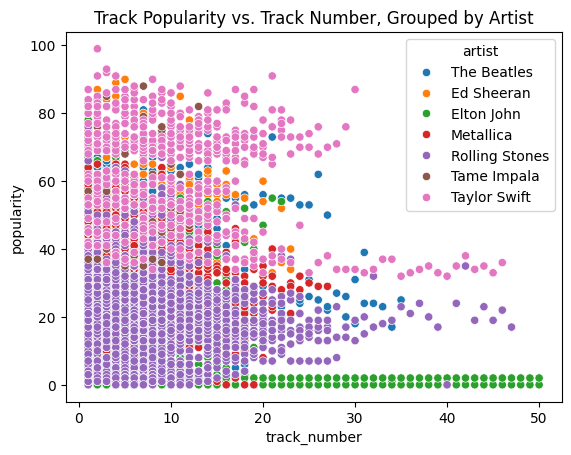

In [33]:
# Create a scatter plot of track popularity vs. track number, grouped by artist
sns.scatterplot(data=artists_df, x="track_number", y="popularity", hue="artist")
plt.title("Track Popularity vs. Track Number, Grouped by Artist")
plt.show()

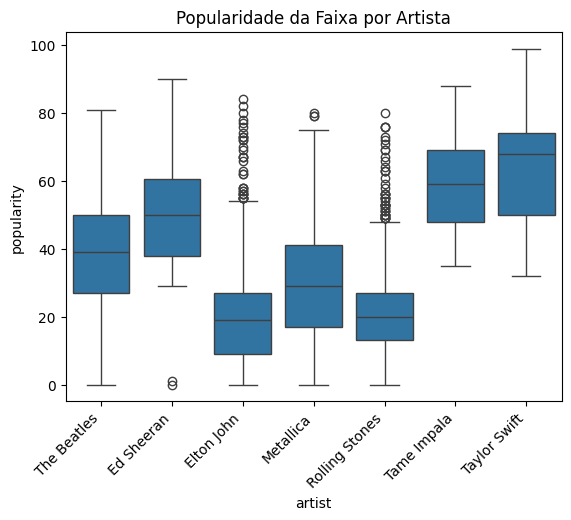

In [34]:
# Criar um boxplot de popularidade da faixa por artista
sns.boxplot(data=artists_df, x="artist", y="popularity")
plt.title("Popularidade da Faixa por Artista")
plt.xticks(rotation=45, ha='right')
plt.show()

artist
Ed Sheeran       -0.043844
Elton John       -0.285664
Metallica        -0.213361
Rolling Stones   -0.145115
Tame Impala       0.062049
Taylor Swift     -0.277312
The Beatles      -0.226629
dtype: float64


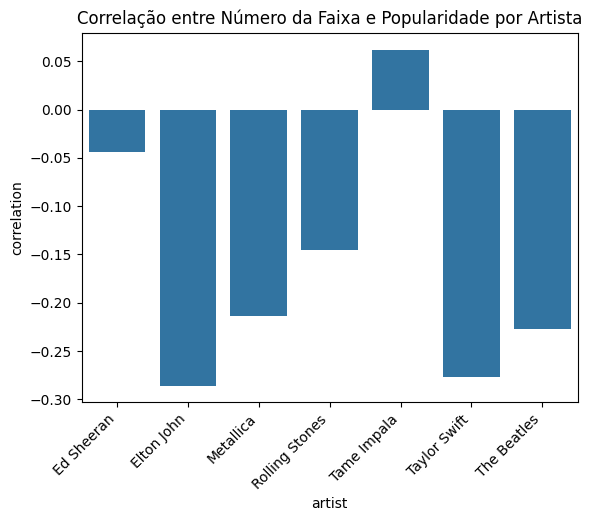

In [35]:
def calculate_correlation(df):
    correlations = df.groupby('artist').apply(lambda group: group['track_number'].corr(group['popularity']))
    return correlations

correlations = calculate_correlation(artists_df)
print(correlations)

correlation_plot = correlations.reset_index().rename(columns={0: 'correlation'})
sns.barplot(data=correlation_plot, x='artist', y='correlation')
plt.title('Correlação entre Número da Faixa e Popularidade por Artista')
plt.xticks(rotation=45, ha='right')
plt.show()